In [0]:
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.interpolate import lagrange
from sklearn.metrics import mean_absolute_error

allPoints = 45
start = -2
end = 2
random_state = 42

**Функція **

In [0]:

def func(a):
  return 1/(1 + 25*(a**2))



In [0]:
def get_xy(allPoints = allPoints, start = start, end = end):
  X = np.linspace(start, end, num=allPoints, endpoint=True)
  Y = func(X)
  return np.array(X), np.array(Y)


**All**

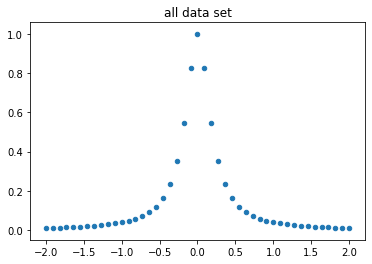

[-2.         -1.81818182 -1.63636364 -1.45454545 -1.27272727 -1.09090909
 -0.90909091 -0.72727273 -0.54545455 -0.36363636 -0.18181818  0.
  0.18181818  0.36363636  0.54545455  0.72727273  0.90909091  1.09090909
  1.27272727  1.45454545  1.63636364  1.81818182  2.        ]


In [0]:


X, y = get_xy(allPoints = allPoints, start= start, end=end)
plt.scatter(X,y, s = 20)
plt.title('all data set')
plt.show()

def every_nth_split(_X, _Y, step):
  _X_temp = [_X[i::step] for i in range(step)]
  _Y_temp = [_Y[i::step] for i in range(step)]
  _X_train = _X_temp[0] 
  _Y_train = _Y_temp[0]
  _X_test = _X_temp[1] 
  _Y_test = _Y_temp[1] 
  return _X_train, _Y_train, _X_test, _Y_test

X_train, y_train, X_test, y_test = every_nth_split(X, y, 2)
print(X_train)


**train data**

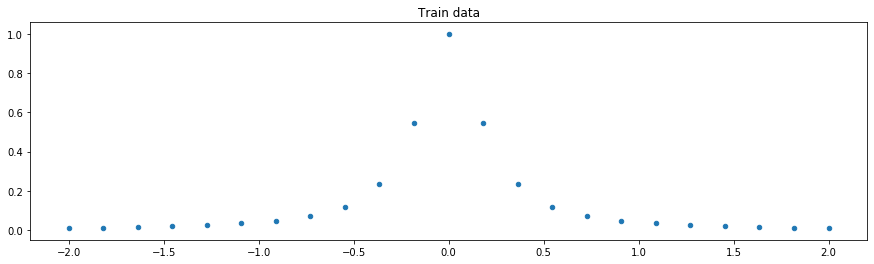

In [0]:
plt.figure(figsize=(15,4))
plt.scatter(X_train,y_train, s = 20)
plt.title('Train data')
plt.show()

**test data**

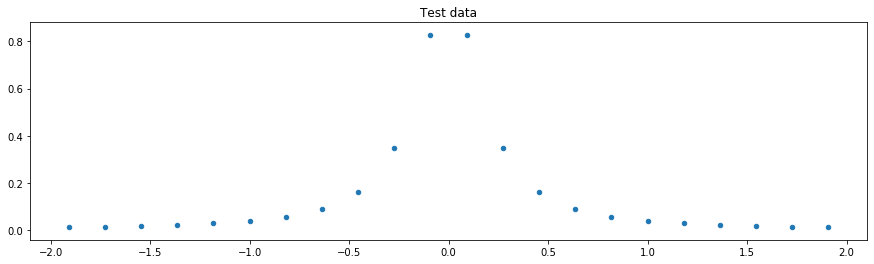

In [0]:
plt.figure(figsize=(15,4))
plt.scatter(X_test,y_test, s = 20)
plt.title('Test data')
plt.show()

<Figure size 432x288 with 0 Axes>

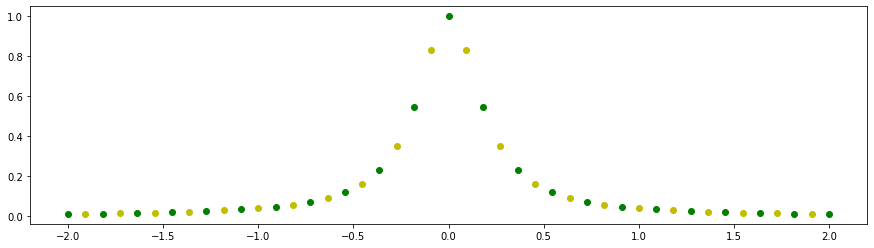

In [0]:
plt.clf()
plt.figure(figsize=(15,4))
plt.plot(X_train, y_train, 'go', X_test, y_test, 'yo') 
plt.show()

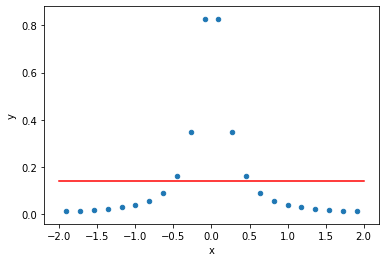

In [0]:
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(X_test,y_test, s = 20)
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "r") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

b = estimate_coef(np.array(X_train),np.array(y_train)) 

  
    # plotting regression line 
plot_regression_line(X_train, y_train, b) 


In [0]:
X_train = X_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]

X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

poly = PolynomialFeatures(degree=1)
poly.fit_transform(X_train)



array([[ 1.        , -2.        ],
       [ 1.        , -1.81818182],
       [ 1.        , -1.63636364],
       [ 1.        , -1.45454545],
       [ 1.        , -1.27272727],
       [ 1.        , -1.09090909],
       [ 1.        , -0.90909091],
       [ 1.        , -0.72727273],
       [ 1.        , -0.54545455],
       [ 1.        , -0.36363636],
       [ 1.        , -0.18181818],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.18181818],
       [ 1.        ,  0.36363636],
       [ 1.        ,  0.54545455],
       [ 1.        ,  0.72727273],
       [ 1.        ,  0.90909091],
       [ 1.        ,  1.09090909],
       [ 1.        ,  1.27272727],
       [ 1.        ,  1.45454545],
       [ 1.        ,  1.63636364],
       [ 1.        ,  1.81818182],
       [ 1.        ,  2.        ]])

-----------Polynomial regression degree = 1
mea 0.1612406343275806
mse: 0.055747857389124154


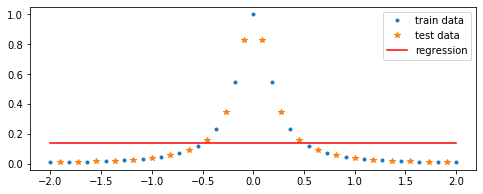

-----------Polynomial regression degree = 2
mea 0.1395637810067577
mse: 0.03753479191447208


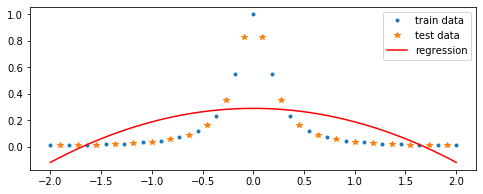

-----------Polynomial regression degree = 3
mea 0.13956378100675768
mse: 0.03753479191447208


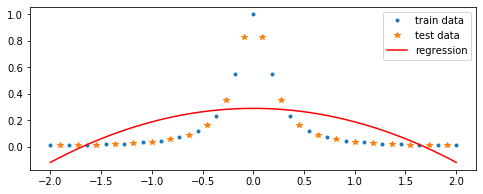

-----------Polynomial regression degree = 4
mea 0.11391052311056081
mse: 0.025216234413085382


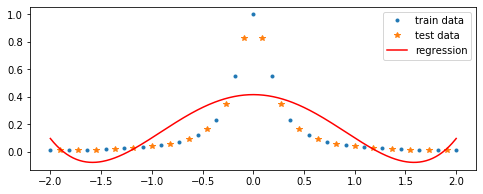

-----------Polynomial regression degree = 5
mea 0.11391052311056077
mse: 0.02521623441308539


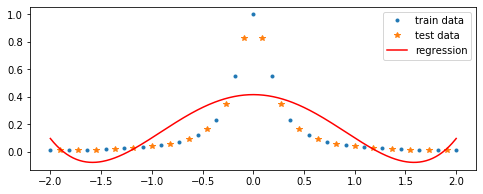

-----------Polynomial regression degree = 10
mea 0.07431917780888797
mse: 0.007757394575733134


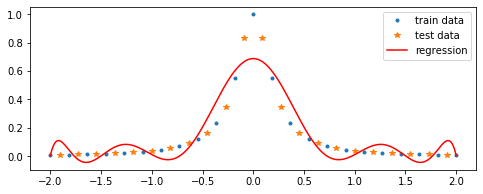

-----------Polynomial regression degree = 15
mea 0.07202910505209849
mse: 0.011623115489345725


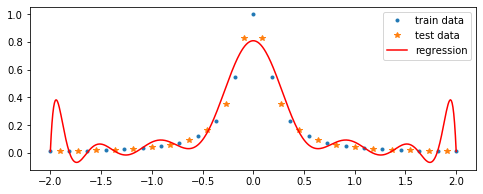

-----------Polynomial regression degree = 20
mea 3.835917845306594
mse: 129.8130063512477


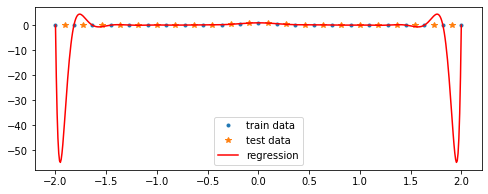

-----------Polynomial regression degree = 21
mea 3.835917842421358
mse: 129.81300614812042


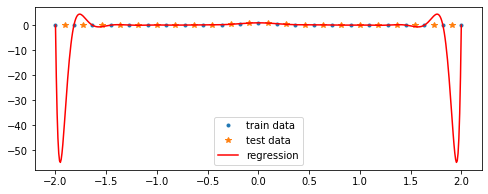

-----------Polynomial regression degree = 22
mea 95.5642289339154
mse: 84972.88262117792


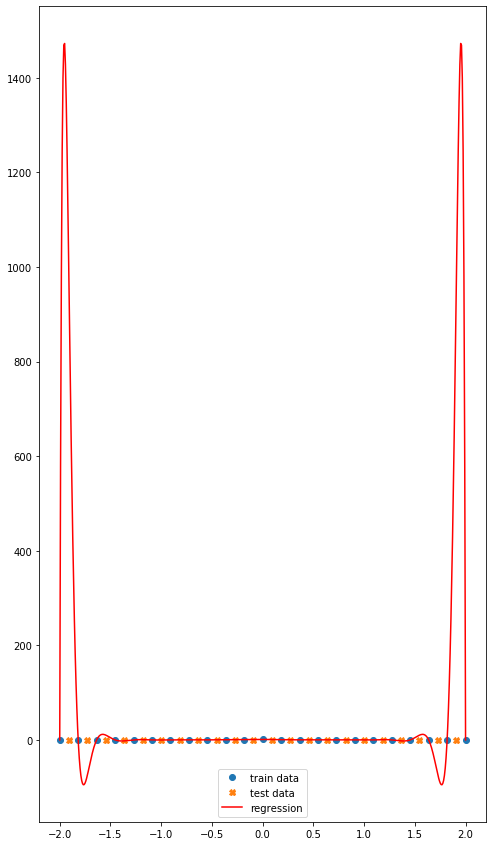

In [0]:
for i in np.arange(1,len(X_train)):
  if (i%5 == 0 )or (i ==1) or i == 2 or i ==3 or i == 4 or i==len(X_train)-2or i==len(X_train)-1: 
      print("-----------Polynomial regression degree =",i)
      polynomial_features= PolynomialFeatures(degree=i)
      x_poly = polynomial_features.fit_transform(X_train)

      model = LinearRegression()
      model.fit(x_poly, y_train)

      y_pred = model.predict(polynomial_features.fit_transform(X_test))

      #mean_abs_error
      mea = mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
      print ("mea", mea)
      # mean_squared_error
      mse = mean_squared_error(y_test, y_pred)
      print("mse:", mse)
      
      # predicted function
      xNew = np.linspace(-2, 2, num=500, endpoint=True)
      xnew = xNew[:, np.newaxis]
      xnew = polynomial_features.fit_transform(xnew)
      ypred = model.predict(xnew)

      if (i == len(X_train)-1):
        plt.figure(figsize=(8,15))
        plt.plot(X_train, y_train, 'o', X_test, y_test, 'X', xNew, ypred, 'r-')
        plt.legend(['train data', 'test data','regression'], loc='best')
        plt.show()
      else:
        plt.figure(figsize=(8,3))
        plt.plot(X_train, y_train, '.', X_test, y_test, '*', xNew, ypred, 'r-')
        plt.legend(['train data', 'test data','regression'], loc='best')
        plt.show()
      

mse: 84972.88349308129
mea 95.5642289339154


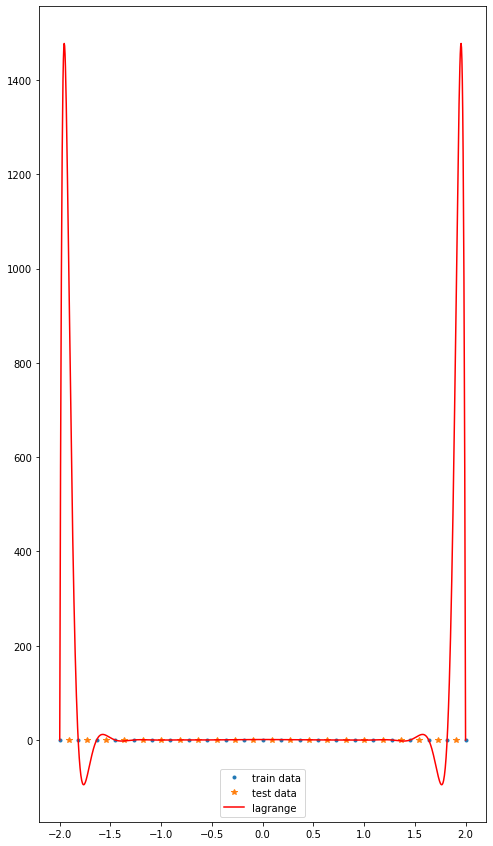

In [0]:

poly = lagrange(np.concatenate(X_train), np.concatenate(y_train))

# mean_squared_error
mse = mean_squared_error(y_test, poly(X_test));
print("mse:", mse);
#mean_abs_error
mea = mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print ("mea", mea)


xnew = np.linspace(-2, 2, num=1000, endpoint=True)
plt.figure(figsize=(8,15))
plt.plot(X_train, y_train, '.', X_test, y_test, '*', xnew, poly(xnew), 'r-')
plt.legend(['train data', 'test data', 'lagrange'], loc='best')
plt.show()

mea 95.5642289339154
mse: 0.0004398472864594801


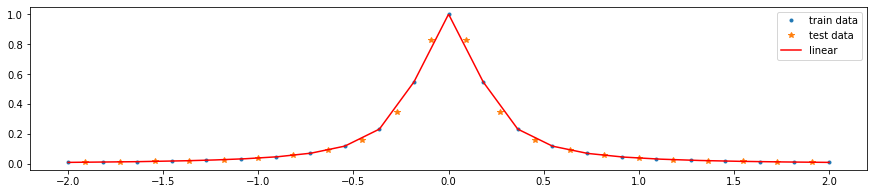

mea 95.5642289339154
mse: 4.591233825929892e-06


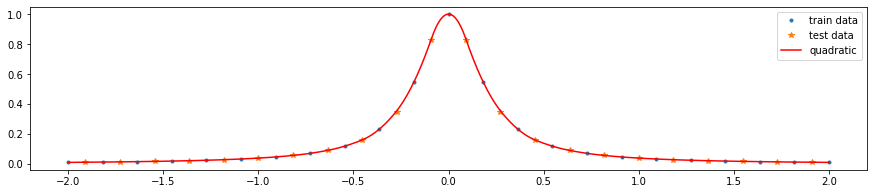

mea 95.5642289339154
mse: 1.4728237390531083e-05


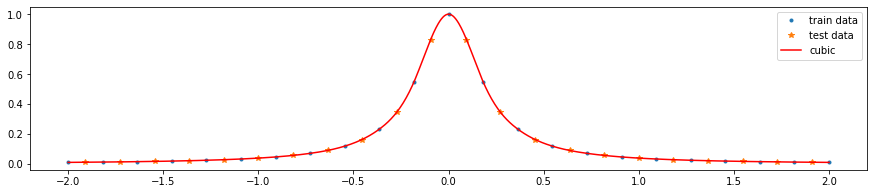

mea 95.5642289339154
mse: 1.4728237390531083e-05


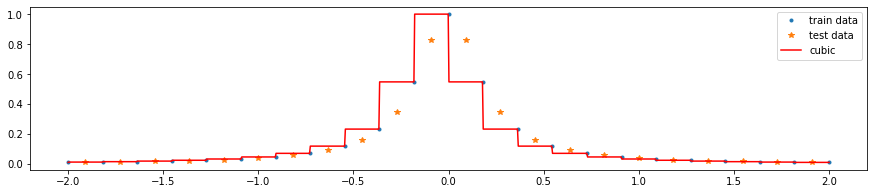

In [0]:
from scipy.interpolate import interp1d

x = np.concatenate(X_train)
y = np.concatenate(y_train)

f = interp1d(x, y, kind = 'linear', bounds_error=False)
f1 = interp1d(x, y, kind='quadratic', bounds_error=False)
f2 = interp1d(x, y, kind='cubic', bounds_error=False)


#mean_abs_error
mea = mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print ("mea", mea)
# mean_squared_error
mse = mean_squared_error(y_test, f(X_test));
print("mse:", mse);


xnew = np.linspace(-2, 2, num=1000, endpoint=True)
plt.figure(figsize=(15,3))
plt.plot(x, y, '.', X_test, y_test, '*', xnew, f(xnew), 'r-')
plt.legend(['train data', 'test data', 'linear'], loc='best')
plt.show()

#mean_abs_error
mea = mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print ("mea", mea)
# mean_squared_error
mse = mean_squared_error(y_test, f1(X_test));
print("mse:", mse);

plt.figure(figsize=(15,3))
plt.plot(x, y, '.', X_test, y_test, '*', xnew, f1(xnew), 'r-')
plt.legend(['train data', 'test data', 'quadratic'], loc='best')
plt.show()

#mean_abs_error
mea = mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print ("mea", mea)
# mean_squared_error
mse = mean_squared_error(y_test, f2(X_test));
print("mse:", mse);

plt.figure(figsize=(15,3))
plt.plot(x, y, '.', X_test, y_test, '*', xnew, f2(xnew), 'r-')
plt.legend(['train data', 'test data', 'cubic'], loc='best')
plt.show()

